# Loading Dataset and Dependencies

In [1]:
import pandas as pd
import numpy as np

In [2]:
xls = pd.ExcelFile('Analytics Position Case Study.xlsx')
game_data = pd.read_excel(xls, 'User Gameplay data', skiprows=3,header=0)
deposit_data = pd.read_excel(xls, 'Deposit Data', skiprows=3,header=0)
withdrawl_data = pd.read_excel(xls, 'Withdrawal Data', skiprows=3,header=0)

# Dataset Pre-processing

In [3]:
#changing column name to maintain consistency
game_data.rename(columns = {'User ID':'User Id'}, inplace = True)
#converting to python Datetime datatype
game_data['Datetime'] = pd.to_datetime(game_data['Datetime'])
deposit_data['Datetime'] = pd.to_datetime(deposit_data['Datetime'])
withdrawl_data['Datetime'] = pd.to_datetime(withdrawl_data['Datetime'])

In [4]:
#segregating in game data according to slots
game_data_s1 = game_data[(game_data['Datetime'].dt.time >= pd.to_datetime('00:00:00').time()) & (game_data['Datetime'].dt.time < pd.to_datetime('12:00:00').time())]
game_data_s2 = game_data[(game_data['Datetime'].dt.time >= pd.to_datetime('12:00:00').time()) & (game_data['Datetime'].dt.time <= pd.to_datetime('23:59:59').time())]

In [5]:
#segregating in deposit data according to slots
deposit_data_s1 = deposit_data[(deposit_data['Datetime'].dt.time >= pd.to_datetime('00:00:00').time()) & (deposit_data['Datetime'].dt.time < pd.to_datetime('12:00:00').time())]
deposit_data_s2 = deposit_data[(deposit_data['Datetime'].dt.time >= pd.to_datetime('12:00:00').time()) & (deposit_data['Datetime'].dt.time <= pd.to_datetime('23:59:59').time())]

In [6]:
#segregating in withdrawl data according to slots
withdrawl_data_s1 = withdrawl_data[(withdrawl_data['Datetime'].dt.time >= pd.to_datetime('00:00:00').time()) & (withdrawl_data['Datetime'].dt.time < pd.to_datetime('12:00:00').time())]
withdrawl_data_s2 = withdrawl_data[(withdrawl_data['Datetime'].dt.time >= pd.to_datetime('12:00:00').time()) & (withdrawl_data['Datetime'].dt.time <= pd.to_datetime('23:59:59').time())]

# Find Playerwise Loyalty points earned by Players in the following slots:- 

### 2nd October Slot S1

In [7]:
#filtering data only of given date
game_data_s1_2oct = game_data_s1[game_data_s1['Datetime'].dt.date == pd.to_datetime('2022-02-10').date()]
deposit_data_s1_2oct = deposit_data_s1[deposit_data_s1['Datetime'].dt.date == pd.to_datetime('2022-02-10').date()]
withdrawl_data_s1_2oct = withdrawl_data_s1[withdrawl_data_s1['Datetime'].dt.date == pd.to_datetime('2022-02-10').date()]

In [8]:
#counting frequency of games played on given date and slot
game_data_s1_2oct_count=game_data_s1_2oct.groupby('User Id').size().reset_index(name='Game_Count')
#counting frequency of money deposited on given date and slot
deposit_data_s1_2oct_count=deposit_data_s1_2oct.groupby('User Id').size().reset_index(name='Deposit_Count')
#counting frequency of money withdrawn on given date and slot
withdrawl_data_s1_2oct_count=withdrawl_data_s1_2oct.groupby('User Id').size().reset_index(name='Withdrawl_Count')

In [9]:
#getting total money deposited and withdrawn on given date and slot.
sumDeposit_id_2oct = deposit_data_s1_2oct.groupby('User Id')['Amount'].sum().reset_index(name='sumDeposit')
sumWithdrawl_id_2oct = withdrawl_data_s1_2oct.groupby('User Id')['Amount'].sum().reset_index(name='sumWithdrawl')

In [10]:
#getting maximun of ((#deposit - #withdrawal) or 0)
df_2oct= pd.merge(deposit_data_s1_2oct_count,withdrawl_data_s1_2oct_count, on=['User Id'], how='outer').fillna(0)
df_2oct['Result'] = np.where(df_2oct['Deposit_Count']-df_2oct['Withdrawl_Count'] < 0, 0, df_2oct['Deposit_Count']-df_2oct['Withdrawl_Count'])

In [11]:
#mergin table to get final table of reuired columns to calculate layality
tf_2oct= pd.merge(sumDeposit_id_2oct,sumWithdrawl_id_2oct, on=['User Id'], how='outer').fillna(0)
final_2oct= pd.merge(df_2oct,tf_2oct, on=['User Id'], how='outer').fillna(0)
final_2oct=final_2oct.drop(['Deposit_Count','Withdrawl_Count'], axis=1)

In [12]:
#mergint with no. of games played
final_2oct= pd.merge(final_2oct,game_data_s1_2oct_count, on=['User Id'], how='outer').fillna(0)

In [13]:
#calculating loyality using given formula
final_2oct['loyalty_point']=(0.01 * final_2oct['sumWithdrawl']) + (0.005 *final_2oct['sumWithdrawl']) + (0.001 * final_2oct['Result']) + (0.2 * final_2oct['Game_Count'])

In [14]:
final_2oct

,User Id,Result,sumDeposit,sumWithdrawl,Game_Count,loyalty_point
0,5.0,1.0,600.0,0.0,9.0,1.801
1,6.0,1.0,4000.0,0.0,2.0,0.401
2,9.0,2.0,3587.0,0.0,52.0,10.402
3,10.0,1.0,2000.0,0.0,13.0,2.601
4,11.0,1.0,2000.0,0.0,15.0,3.001
...,...,...,...,...,...,...
631,990.0,0.0,0.0,0.0,70.0,14.000
632,992.0,0.0,0.0,0.0,42.0,8.400
633,996.0,0.0,0.0,0.0,11.0,2.200
634,997.0,0.0,0.0,0.0,5.0,1.000


### 16th October Slot S2

In [15]:
#filtering data only of given date
game_data_s2_16oct = game_data_s2[game_data_s2['Datetime'].dt.date == pd.to_datetime('2022-10-16').date()]
deposit_data_s2_16oct = deposit_data_s2[deposit_data_s2['Datetime'].dt.date == pd.to_datetime('2022-10-16').date()]
withdrawl_data_s2_16oct = withdrawl_data_s2[withdrawl_data_s2['Datetime'].dt.date == pd.to_datetime('2022-10-16').date()]

#counting frequency of games played on given date and slot
game_data_s2_16oct_count=game_data_s2_16oct.groupby('User Id').size().reset_index(name='Game_Count')
#counting frequency of money deposited on given date and slot
deposit_data_s2_16oct_count=deposit_data_s2_16oct.groupby('User Id').size().reset_index(name='Deposit_Count')
#counting frequency of money withdrawn on given date and slot
withdrawl_data_s2_16oct_count=withdrawl_data_s2_16oct.groupby('User Id').size().reset_index(name='Withdrawl_Count')


#getting total money deposited and withdrawn on given date and slot.
sumDeposit_id_16oct = deposit_data_s2_16oct.groupby('User Id')['Amount'].sum().reset_index(name='sumDeposit')
sumWithdrawl_id_16oct = withdrawl_data_s2_16oct.groupby('User Id')['Amount'].sum().reset_index(name='sumWithdrawl')

#getting maximun of ((#deposit - #withdrawal) or 0)
df_16oct= pd.merge(deposit_data_s2_16oct_count,withdrawl_data_s2_16oct_count, on=['User Id'], how='outer').fillna(0)
df_16oct['Result'] = np.where(df_16oct['Deposit_Count']-df_16oct['Withdrawl_Count'] < 0, 0, df_16oct['Deposit_Count']-df_16oct['Withdrawl_Count'])


#mergin table to get final table of reuired columns to calculate layality
tf_16oct= pd.merge(sumDeposit_id_16oct,sumWithdrawl_id_16oct, on=['User Id'], how='outer').fillna(0)
final_16oct= pd.merge(df_16oct,tf_16oct, on=['User Id'], how='outer').fillna(0)
final_16oct=final_16oct.drop(['Deposit_Count','Withdrawl_Count'], axis=1)

#mergint with no. of games played
final_16oct= pd.merge(final_16oct,game_data_s2_16oct_count, on=['User Id'], how='outer').fillna(0)

#calculating loyality using given formula
final_16oct['loyalty_point']=(0.01 * final_16oct['sumWithdrawl']) + (0.005 *final_16oct['sumWithdrawl']) + (0.001 * final_16oct['Result']) + (0.2 * final_16oct['Game_Count'])

In [16]:
final_16oct

,User Id,Result,sumDeposit,sumWithdrawl,Game_Count,loyalty_point
0,5.0,2.0,1000.0,0.0,9.0,1.802
1,9.0,1.0,2000.0,0.0,51.0,10.201
2,11.0,1.0,4000.0,0.0,15.0,3.001
3,12.0,1.0,3200.0,0.0,3.0,0.601
4,16.0,0.0,5000.0,31305.0,25.0,474.575
...,...,...,...,...,...,...
589,989.0,0.0,0.0,0.0,65.0,13.000
590,990.0,0.0,0.0,0.0,62.0,12.400
591,992.0,0.0,0.0,0.0,44.0,8.800
592,996.0,0.0,0.0,0.0,9.0,1.800


### 18th October Slot S1

In [17]:
#filtering data only of given date
game_data_s1_18oct = game_data_s1[game_data_s1['Datetime'].dt.date == pd.to_datetime('2022-10-16').date()]
deposit_data_s1_18oct = deposit_data_s1[deposit_data_s1['Datetime'].dt.date == pd.to_datetime('2022-10-16').date()]
withdrawl_data_s1_18oct = withdrawl_data_s1[withdrawl_data_s1['Datetime'].dt.date == pd.to_datetime('2022-10-16').date()]

#counting frequency of games played on given date and slot
game_data_s1_18oct_count=game_data_s1_18oct.groupby('User Id').size().reset_index(name='Game_Count')
#counting frequency of money deposited on given date and slot
deposit_data_s1_18oct_count=deposit_data_s1_18oct.groupby('User Id').size().reset_index(name='Deposit_Count')
#counting frequency of money withdrawn on given date and slot
withdrawl_data_s1_18oct_count=withdrawl_data_s1_18oct.groupby('User Id').size().reset_index(name='Withdrawl_Count')


#getting total money deposited and withdrawn on given date and slot.
sumDeposit_id_18oct = deposit_data_s1_18oct.groupby('User Id')['Amount'].sum().reset_index(name='sumDeposit')
sumWithdrawl_id_18oct = withdrawl_data_s1_18oct.groupby('User Id')['Amount'].sum().reset_index(name='sumWithdrawl')

#getting maximun of ((#deposit - #withdrawal) or 0)
df_18oct= pd.merge(deposit_data_s1_18oct_count,withdrawl_data_s1_18oct_count, on=['User Id'], how='outer').fillna(0)
df_18oct['Result'] = np.where(df_18oct['Deposit_Count']-df_18oct['Withdrawl_Count'] < 0, 0, df_18oct['Deposit_Count']-df_18oct['Withdrawl_Count'])


#mergin table to get final table of reuired columns to calculate layality
tf_18oct= pd.merge(sumDeposit_id_18oct,sumWithdrawl_id_18oct, on=['User Id'], how='outer').fillna(0)
final_18oct= pd.merge(df_18oct,tf_18oct, on=['User Id'], how='outer').fillna(0)
final_18oct=final_18oct.drop(['Deposit_Count','Withdrawl_Count'], axis=1)

#mergint with no. of games played
final_18oct= pd.merge(final_18oct,game_data_s1_18oct_count, on=['User Id'], how='outer').fillna(0)

#calculating loyality using given formula
final_18oct['loyalty_point']=(0.01 * final_18oct['sumWithdrawl']) + (0.005 *final_18oct['sumWithdrawl']) + (0.001 * final_18oct['Result']) + (0.2 * final_18oct['Game_Count'])

In [18]:
final_18oct

,User Id,Result,sumDeposit,sumWithdrawl,Game_Count,loyalty_point
0,5.0,1.0,500.0,0.0,7.0,1.401
1,9.0,4.0,7539.0,0.0,49.0,9.804
2,12.0,3.0,3190.0,0.0,0.0,0.003
3,14.0,1.0,100.0,0.0,0.0,0.001
4,16.0,2.0,8000.0,0.0,37.0,7.402
...,...,...,...,...,...,...
626,990.0,0.0,0.0,0.0,77.0,15.400
627,995.0,0.0,0.0,0.0,1.0,0.200
628,996.0,0.0,0.0,0.0,6.0,1.200
629,997.0,0.0,0.0,0.0,3.0,0.600


### 26th October Slot S2

In [19]:
#filtering data only of given date
game_data_s2_26oct = game_data_s2[game_data_s2['Datetime'].dt.date == pd.to_datetime('2022-10-26').date()]
deposit_data_s2_26oct = deposit_data_s2[deposit_data_s2['Datetime'].dt.date == pd.to_datetime('2022-10-26').date()]
withdrawl_data_s2_26oct = withdrawl_data_s2[withdrawl_data_s2['Datetime'].dt.date == pd.to_datetime('2022-10-26').date()]

#counting frequency of games played on given date and slot
game_data_s2_26oct_count=game_data_s2_26oct.groupby('User Id').size().reset_index(name='Game_Count')
#counting frequency of money deposited on given date and slot
deposit_data_s2_26oct_count=deposit_data_s2_26oct.groupby('User Id').size().reset_index(name='Deposit_Count')
#counting frequency of money withdrawn on given date and slot
withdrawl_data_s2_26oct_count=withdrawl_data_s2_26oct.groupby('User Id').size().reset_index(name='Withdrawl_Count')


#getting total money deposited and withdrawn on given date and slot.
sumDeposit_id_26oct = deposit_data_s2_26oct.groupby('User Id')['Amount'].sum().reset_index(name='sumDeposit')
sumWithdrawl_id_26oct = withdrawl_data_s2_26oct.groupby('User Id')['Amount'].sum().reset_index(name='sumWithdrawl')

#getting maximun of ((#deposit - #withdrawal) or 0)
df_26oct= pd.merge(deposit_data_s2_26oct_count,withdrawl_data_s2_26oct_count, on=['User Id'], how='outer').fillna(0)
df_26oct['Result'] = np.where(df_26oct['Deposit_Count']-df_26oct['Withdrawl_Count'] < 0, 0, df_26oct['Deposit_Count']-df_26oct['Withdrawl_Count'])


#mergin table to get final table of reuired columns to calculate layality
tf_26oct= pd.merge(sumDeposit_id_26oct,sumWithdrawl_id_26oct, on=['User Id'], how='outer').fillna(0)
final_26oct= pd.merge(df_26oct,tf_26oct, on=['User Id'], how='outer').fillna(0)
final_26oct=final_26oct.drop(['Deposit_Count','Withdrawl_Count'], axis=1)

#mergint with no. of games played
final_26oct= pd.merge(final_26oct,game_data_s2_26oct_count, on=['User Id'], how='outer').fillna(0)

#calculating loyality using given formula
final_26oct['loyalty_point']=(0.01 * final_26oct['sumWithdrawl']) + (0.005 *final_26oct['sumWithdrawl']) + (0.001 * final_26oct['Result']) + (0.2 * final_26oct['Game_Count'])

In [20]:
final_26oct

,User Id,Result,sumDeposit,sumWithdrawl,Game_Count,loyalty_point
0,2.0,2.0,90000.0,0.0,0.0,0.002
1,5.0,1.0,1000.0,0.0,4.0,0.801
2,9.0,0.0,1000.0,20076.0,44.0,309.940
3,10.0,1.0,1400.0,0.0,8.0,1.601
4,11.0,1.0,2000.0,0.0,11.0,2.201
...,...,...,...,...,...,...
623,991.0,0.0,0.0,0.0,1.0,0.200
624,995.0,0.0,0.0,0.0,1.0,0.200
625,996.0,0.0,0.0,0.0,4.0,0.800
626,997.0,0.0,0.0,0.0,2.0,0.400


# Calculate overall loyalty points earned and rank players on the basis of   loyalty points in the month of October. 

In [21]:
#filtering data only of given date
game_data_oct = game_data[game_data['Datetime'].dt.month == 10]
deposit_data_oct = deposit_data[deposit_data['Datetime'].dt.month == 10]
withdrawl_data_oct = withdrawl_data[withdrawl_data['Datetime'].dt.month == 10]

In [22]:
#counting frequency of games played in october
game_data_oct_count=game_data_oct.groupby('User Id').size().reset_index(name='Game_Count')
#counting frequency of money deposited on given date and slot
deposit_data_oct_count=deposit_data_oct.groupby('User Id').size().reset_index(name='Deposit_Count')
#counting frequency of money withdrawn on given date and slot
withdrawl_data_oct_count=withdrawl_data_oct.groupby('User Id').size().reset_index(name='Withdrawl_Count')

In [23]:
#getting total money deposited and withdrawn on given date and slot.
sumDeposit_id_oct = deposit_data_oct.groupby('User Id')['Amount'].sum().reset_index(name='sumDeposit')
sumWithdrawl_id_oct = withdrawl_data_oct.groupby('User Id')['Amount'].sum().reset_index(name='sumWithdrawl')

In [24]:
#getting maximun of ((#deposit - #withdrawal) or 0)
df_oct= pd.merge(deposit_data_oct_count,withdrawl_data_oct_count, on=['User Id'], how='outer').fillna(0)
df_oct['Result'] = np.where(df_oct['Deposit_Count']-df_oct['Withdrawl_Count'] < 0, 0, df_oct['Deposit_Count']-df_oct['Withdrawl_Count'])

In [25]:
#mergin table to get final table of reuired columns to calculate layality
tf_oct= pd.merge(sumDeposit_id_oct,sumWithdrawl_id_oct, on=['User Id'], how='outer').fillna(0)
final_oct= pd.merge(df_oct,tf_oct, on=['User Id'], how='outer').fillna(0)
final_oct=final_oct.drop(['Deposit_Count','Withdrawl_Count'], axis=1)

In [26]:
#mergint with no. of games played
final_oct= pd.merge(final_oct,game_data_oct_count, on=['User Id'], how='outer').fillna(0)

In [27]:
#calculating loyality using given formula
final_oct['loyalty_point']=(0.01 * final_oct['sumWithdrawl']) + (0.005 *final_oct['sumWithdrawl']) + (0.001 * final_oct['Result']) + (0.2 * final_oct['Game_Count'])

In [36]:
final_oct.sort_values(by = ['loyalty_point', 'Game_Count'], ascending = [False, False]).head(50)

,User Id,Result,sumDeposit,sumWithdrawl,Game_Count,loyalty_point
545,634.0,0.0,270000.0,11683352.0,22.0,175254.680
308,365.0,0.0,279000.0,1425235.0,2368.0,21852.125
795,920.0,0.0,211500.0,1333015.0,614.0,20118.025
312,369.0,1.0,450000.0,1326542.0,22.0,19902.531
132,162.0,0.0,56460.0,1270000.0,0.0,19050.000
586,678.0,13.0,227000.0,1100000.0,9.0,16501.813
58,78.0,0.0,103500.0,1075400.0,379.0,16206.800
1,2.0,0.0,342000.0,898466.0,66.0,13490.190
354,415.0,1.0,200000.0,898764.0,19.0,13485.261
288,344.0,4.0,242150.0,864000.0,1.0,12960.204


# Average deposit amount

In [29]:
sum_deposit_amount = deposit_data.groupby('User Id')['Amount'].sum().reset_index(name='Total_Amount')

In [30]:
sum_deposit_amount['Total_Amount'].mean()

104669.64918032786

# Average deposit amount per user in a month

In [31]:
deposit_data['Month'] = pd.to_datetime(deposit_data['Datetime']).dt.month


In [32]:
average_amount_per_user = deposit_data.groupby('Month')['Amount'].mean().reset_index(name='Average_Amount')


In [33]:
average_amount_per_user

,Month,Average_Amount
0,1,4896.937397
1,2,4883.574106
2,3,5154.971480
3,4,4990.715232
4,5,5179.601054
5,6,5584.013986
6,7,5881.150659
7,8,6300.759494
8,9,5074.035654
9,10,5604.514460


# Average number of games played per user

In [34]:
game_data_count=game_data.groupby('User Id').size().reset_index(name='Game_Count')

In [35]:
game_data_count['Game_Count'].mean()

355.266

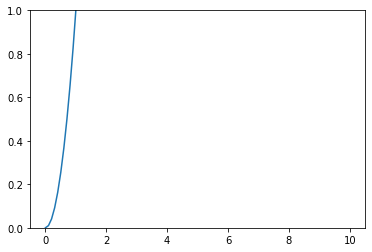

In [2]:
# Create some data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

x = np.linspace(0, 10, 100)
y = x ** 2

# Plot the data
plt.plot(x, y)

# Shift the y-axis
plt.ylim(0, 1)

# Show the plot
plt.show()